In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import plotly.express as px
from prophet import Prophet

In [20]:
df = pd.read_csv('donnees_meteo_148_stations.csv')

In [21]:
# Colonne 'date' au format datetime
df['date'] = pd.to_datetime(df['date'])

# EDA

### Températures

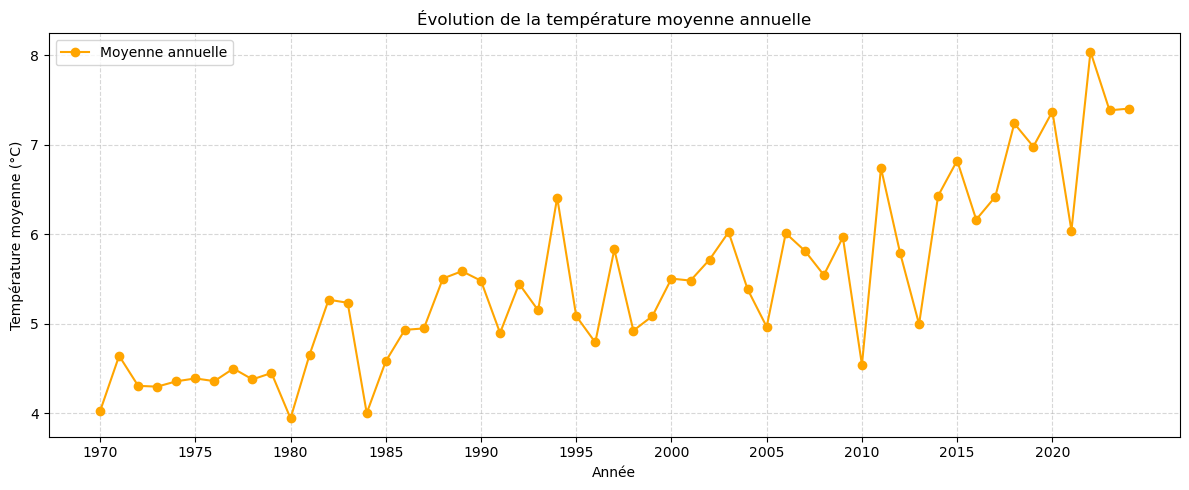

In [22]:
# Extraire l'année
df['year'] = df['date'].dt.year

# Exclure l'année 2025 (données incomplètes)
df_filtered = df[df['year'] < 2025]

# Calcul de la température moyenne par année
df_yearly_mean = df_filtered.groupby('year')['temperature_2m_mean'].mean().reset_index()

# Graphique
plt.figure(figsize=(12, 5))
plt.plot(df_yearly_mean['year'], df_yearly_mean['temperature_2m_mean'],
         marker='o', color='orange', label='Moyenne annuelle')

plt.title("Évolution de la température moyenne annuelle")
plt.xlabel("Année")
plt.ylabel("Température moyenne (°C)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# Afficher les ticks tous les 5 ans
plt.xticks(
    ticks=range(df_yearly_mean['year'].min(), df_yearly_mean['year'].max()+1, 5)
)

plt.tight_layout()
plt.show()

### Précipitations

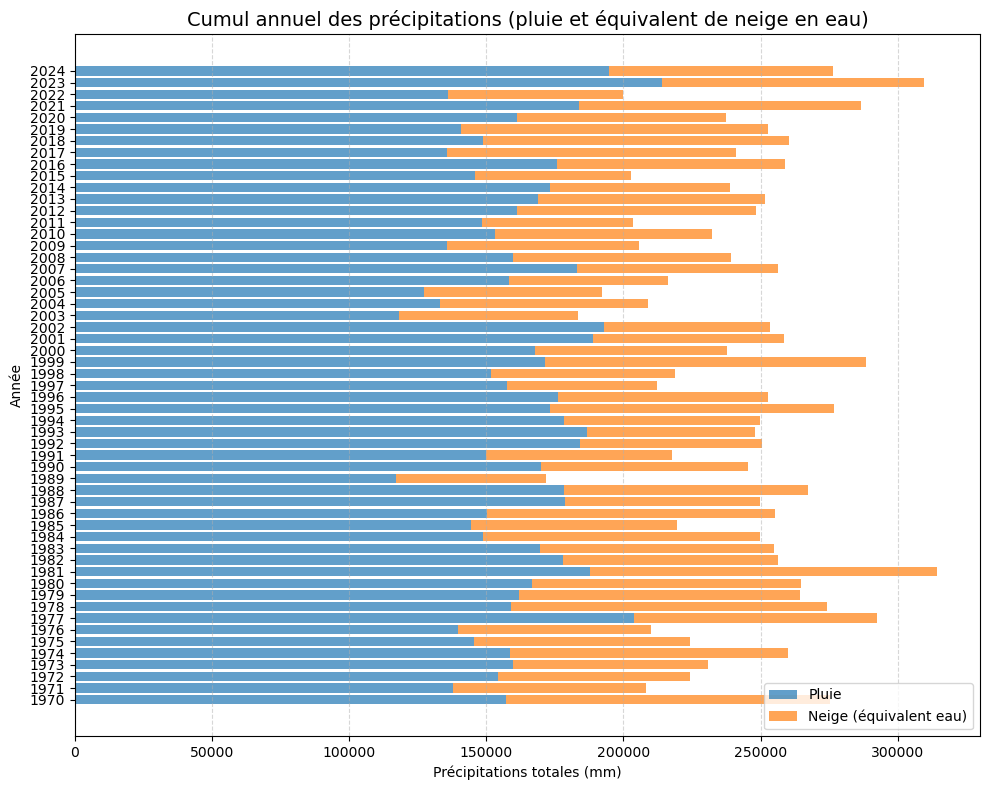

In [23]:
# Extraire l'année
df['year'] = df['date'].dt.year

# Grouper par année et additionner les précipitations
df_yearly = df.groupby('year')[['rain_sum', 'snowfall_water_equivalent_sum']].sum().reset_index()

# Supprimer l'année 2025
df_yearly = df_yearly[df_yearly['year'] != 2025]

# Affichage du graphique en barres horizontales empilées
plt.figure(figsize=(10, 8))

plt.barh(df_yearly['year'], df_yearly['rain_sum'], label='Pluie', alpha=0.7)
plt.barh(df_yearly['year'], df_yearly['snowfall_water_equivalent_sum'],
         left=df_yearly['rain_sum'], label='Neige (équivalent eau)', alpha=0.7)

plt.title('Cumul annuel des précipitations (pluie et équivalent de neige en eau)', fontsize=14)
plt.ylabel('Année')
plt.xlabel('Précipitations totales (mm)')
plt.yticks(df_yearly['year'])
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

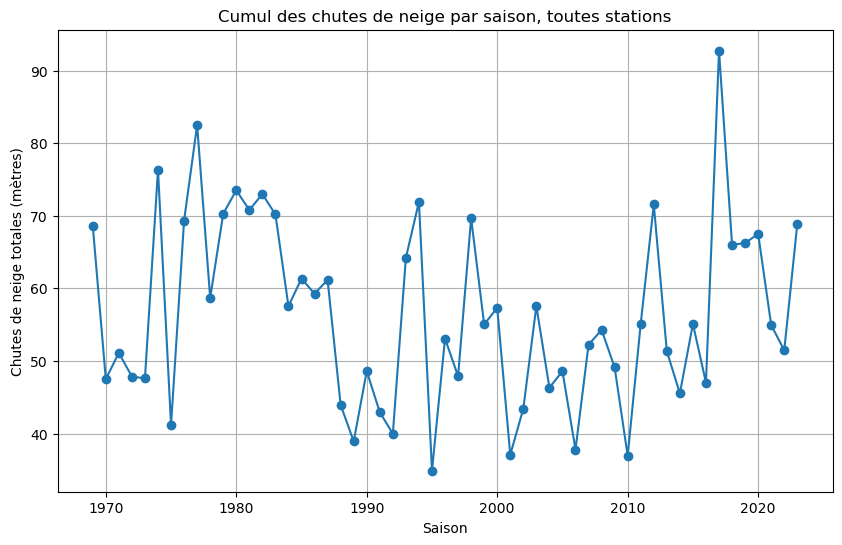

In [24]:
# Supprimer les données à partir du 1er août 2024
df = df[df['date'] < '2024-08-01']

# Crée une colonne "season_year" : ex. 2023-2024 => "2023"
df['season'] = df['date'].apply(lambda x: x.year if x.month >= 8 else x.year - 1)

# Total des chutes de neige par saison pour toutes les stations
seasonal_snowfall = df.groupby('season')['snowfall_sum'].sum().reset_index()

# Convertir les valeurs de mm en mètres
seasonal_snowfall['snowfall_sum'] = seasonal_snowfall['snowfall_sum'] / 1000

# Tri des saisons
seasonal_snowfall = seasonal_snowfall.sort_values('season')

# Affichage avec matplotlib
plt.figure(figsize=(10,6))
plt.plot(seasonal_snowfall['season'], seasonal_snowfall['snowfall_sum'], marker='o')
plt.xlabel('Saison')
plt.ylabel('Chutes de neige totales (mètres)')
plt.title('Cumul des chutes de neige par saison, toutes stations')
plt.grid(True)
plt.show()
